In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.formula.api import ols

import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv('cleaned_amazon.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)

In [3]:
# Creates dummy variables for the month when the product was at its lowest price
ld_dummies = pd.get_dummies(df['lowest_date'], prefix='ld', drop_first=True)

In [5]:
# Creates dummy variables for the month when the product was at its highest price
hd_dummies = pd.get_dummies(df['highest_date'], prefix='hd', drop_first=True)

In [6]:
df.rating.value_counts()

4.5    54
4.4    49
4.3    49
4.6    33
4.1    32
4.2    31
4.0    29
4.7    24
3.9    20
3.8    16
4.8    14
3.7    12
3.6     6
3.5     2
3.4     1
3.3     1
Name: rating, dtype: int64

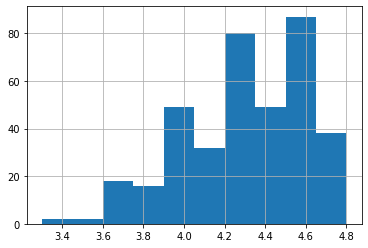

In [7]:
df.rating.hist()

In [9]:
# creates bins for the ratings.  Allows for manual equal distribution for the model 
bins = [3,3.6,3.8,4,4.2,4.4,4.6,4.8]
bins_rating = pd.cut(df['rating'],bins)

In [10]:
bins_rating = bins_rating.cat.as_ordered()

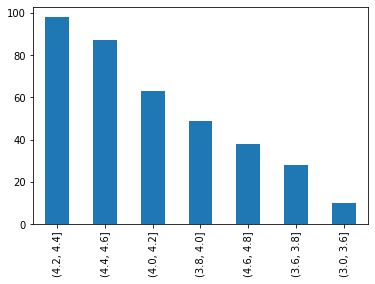

In [11]:
# rating counts 
bins_rating.value_counts().plot(kind='bar')

In [14]:
df.rating = bins_rating

In [15]:
df.rating = df.rating.cat.codes

In [17]:
df.head()

,current_date,highest_price,highest_date,lowest_price,lowest_date,asin,category,name,num_reviews,price,product_id,rating,url
0,Oct,49.99,Sep,34.99,Oct,B079QHML21,Electronics,"Fire TV Stick 4K with Alexa Voice Remote, stre...",48229,34.99,B079QHML21,5,https://www.amazon.com/Fire-TV-Stick-4K-with-A...
1,Oct,39.99,Aug,24.99,Oct,B0791TX5P5,Electronics,"Fire TV Stick with Alexa Voice Remote, streami...",40788,24.99,B0791TX5P5,5,https://www.amazon.com/Fire-TV-Stick-with-Alex...
2,Oct,49.99,Oct,24.99,Aug,B07FZ8S74R,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64398,49.99,B07FZ8S74R,5,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,Feb,24.99,Feb,19.99,Feb,B01MZEEFNX,Electronics,"Amazon Smart Plug, works with Alexa – A Certif...",14517,24.99,B01MZEEFNX,5,https://www.amazon.com/Amazon-Smart-Plug-works...
4,Oct,49.99,Oct,24.99,Aug,B07PGL2N7J,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PGL2N7J,5,https://www.amazon.com/Echo-Dot-3rd-Gen-Sandst...


In [18]:
# Creates dummy variables for the rating's 
rating_dummies = pd.get_dummies(bins_rating, prefix='rating', drop_first=True)

In [19]:
df = pd.concat([df,rating_dummies,hd_dummies,ld_dummies],axis=1)

In [20]:
df = df.rename(columns={'rating_(3.6, 3.8]':'rating38','rating_(3.8, 4.0]':'rating40','rating_(4.0, 4.2]':'rating42','rating_(4.2, 4.4]':'rating_44','rating_(4.4, 4.6]':'rating46','rating_(4.6, 4.8]':'rating48'})

In [23]:
df = df.drop(['asin','category','url','name','product_id','current_date', 'rating','highest_date','lowest_date'],axis=1)

## Building Linear Regression Model

In [24]:
outcome = 'lowest_price'
predictors = df.drop('lowest_price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [27]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          2.83e-215
Time:                        15:34:30   Log-Likelihood:                -1357.2
No. Observations:                 369   AIC:                             2778.
Df Residuals:                     337   BIC:                             2903.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5595      4.597     -0.122      0.903      -9.603       8.484
highest_price     0.4147      0.018     23.202      0.000       0.380       0.450
num_reviews   -9.655e-05   3.75e-05     -2.575      0.010      -0.000   -2.28e-05
price             0.2258      0.023      9.819      0.000       0.181       0.271
rating38          0.0159      3.965      0.004      0.997      -7.784       7.815
rating40         -3.6275      3.636     -0.998      0.319     -10.779       3.524
rating42         -5.0397      3.648     -1.381      0.168     -12.216       2.136
rating_44        -4.0610      3.528     -1.151      0.250     -11.000       2.878
rating46         -2.3548      3.564     -0.661      0.509      -9.365       4.655
rating48         -6.2864      3.776     -1.665      0.097     -13.715       1.142
hd_Aug           -2.8783      2.609     -1.103      0.271      -8.010       2.254
hd_Dec            0.6259      2.825      0.222      0.825      -4.931       6.183
hd_Feb            0.1715      2.925      0.059      0.953      -5.583       5.926
hd_Jan           -0.0641      3.386     -0.019      0.985      -6.725       6.597
hd_Jul           -0.5446      3.460     -0.157      0.875      -7.351       6.262
hd_Jun            0.2818      2.687      0.105      0.917      -5.003       5.567
hd_Mar           -4.1557      3.214     -1.293      0.197     -10.478       2.166
hd_May           -0.9868      2.907     -0.339      0.734      -6.704       4.731
hd_Nov            0.0675      2.953      0.023      0.982      -5.741       5.876
hd_Oct            0.8863      2.600      0.341      0.733      -4.228       6.000
hd_Sep            6.0250      2.544      2.369      0.018       1.021      11.029
ld_Aug            8.1725      2.906      2.812      0.005       2.456      13.889
ld_Dec            1.6109      3.167      0.509      0.611      -4.619       7.841
ld_Feb            2.1023      3.400      0.618      0.537      -4.586       8.791
ld_Jan            2.9681      3.144      0.944      0.346      -3.216       9.152
ld_Jul            5.4041      3.087      1.751      0.081      -0.668      11.476
ld_Jun            4.8470      3.180      1.524      0.128      -1.408      11.102
ld_Mar            4.0244      3.971      1.014      0.312      -3.786      11.835
ld_May            1.8534      3.257      0.569      0.570      -4.553       8.260
ld_Nov            0.3848      2.918      0.132      0.895      -5.356       6.126
ld_Oct            5.0270      2.994      1.679      0.094      -0.863      10.917
ld_Sep            5.0315      3.096      1.625      0.105      -1.058      11.121
==============================================================================
Omnibus:                      108.270   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB

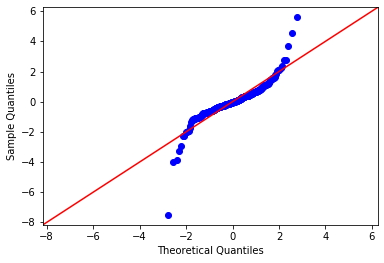

In [29]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [30]:
rating_cols = ['rating38','rating40','rating42','rating44','rating46','rating48']


In [31]:
outcome = 'lowest_price'
rating_cols = ['rating38','rating40','rating42','rating_44','rating46','rating48']
predictors_rating = '+'.join(rating_cols)
formula_rating = outcome + '~' + predictors_rating

In [32]:
model_rating = ols(formula=formula_rating, data=df).fit()
model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.899
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           0.000867
Time:                        15:35:30   Log-Likelihood:                -1958.7
No. Observations:                 373   AIC:                             3931.
Df Residuals:                     366   BIC:                             3959.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4990     14.737      3.630      0.000      24.518      82.480
rating38       5.5364     17.169      0.322      0.747     -28.225      39.298
rating40     -23.2417     16.171     -1.437      0.152     -55.042       8.559
rating42     -22.4001     15.864     -1.412      0.159     -53.596       8.796
rating_44    -25.4591     15.471     -1.646      0.101     -55.882       4.964
rating46     -30.7715     15.561     -1.977      0.049     -61.372      -0.171
rating48     -44.8398     16.563     -2.707      0.007     -77.411     -12.268
==============================================================================
Omnibus:                      405.697   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21263.802
Skew:                           4.774   Prob(JB):                         0.00
Kurtosis:                      38.735   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
outcome = 'lowest_price'
hd_cols = hd_dummies.columns
predictors_hd = '+'.join(hd_cols)
formula_hd = outcome + '~' + predictors_hd

In [40]:
model_hd = ols(formula=formula_hd, data=df).fit()
model_hd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.042
Date:                Sat, 21 Dec 2019   Prob (F-statistic):             0.0239
Time:                        15:40:23   Log-Likelihood:                -1959.0
No. Observations:                 373   AIC:                             3942.
Df Residuals:                     361   BIC:                             3989.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0738      9.586      2.094      0.037       1.222      38.926
hd_Aug        13.3680     11.870      1.126      0.261      -9.976      36.712
hd_Dec         4.3825     12.960      0.338      0.735     -21.103      29.868
hd_Feb        -5.2793     13.175     -0.401      0.689     -31.189      20.630
hd_Jan        -9.3691     15.457     -0.606      0.545     -39.767      21.029
hd_Jul        12.2169     15.157      0.806      0.421     -17.591      42.024
hd_Jun         7.7550     12.126      0.640      0.523     -16.091      31.601
hd_Mar       -10.5814     14.887     -0.711      0.478     -39.858      18.695
hd_May         7.7051     13.175      0.585      0.559     -18.204      33.615
hd_Nov         4.0759     13.421      0.304      0.762     -22.317      30.469
hd_Oct         5.9306     11.741      0.505      0.614     -17.158      29.020
hd_Sep        30.5099     11.343      2.690      0.007       8.204      52.816
==============================================================================
Omnibus:                      403.962   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20358.326
Skew:                           4.758   Prob(JB):                         0.00
Kurtosis:                      37.919   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
outcome = 'lowest_price'
ld_cols = ld_dummies.columns
predictors_ld = '+'.join(ld_cols)
formula_ld = outcome + '~' + predictors_ld

In [42]:
model_ld = ols(formula=formula_ld, data=df).fit()
model_ld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.058
Date:                Sat, 21 Dec 2019   Prob (F-statistic):             0.0227
Time:                        15:42:36   Log-Likelihood:                -1958.9
No. Observations:                 373   AIC:                             3942.
Df Residuals:                     361   BIC:                             3989.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5806     11.388      1.280      0.201      -7.814      36.975
ld_Aug        35.9363     13.118      2.740      0.006      10.140      61.733
ld_Dec        -0.8606     14.170     -0.061      0.952     -28.727      27.005
ld_Feb        -2.2711     15.489     -0.147      0.884     -32.731      28.188
ld_Jan         9.3485     13.947      0.670      0.503     -18.079      36.776
ld_Jul        21.8531     13.880      1.574      0.116      -5.443      49.149
ld_Jun         8.3248     14.436      0.577      0.565     -20.065      36.715
ld_Mar         4.8221     18.168      0.265      0.791     -30.907      40.551
ld_May         6.5625     14.645      0.448      0.654     -22.237      35.362
ld_Nov        10.0977     13.288      0.760      0.448     -16.035      36.230
ld_Oct        19.7865     13.544      1.461      0.145      -6.849      46.422
ld_Sep        20.1165     14.170      1.420      0.157      -7.750      47.983
==============================================================================
Omnibus:                      400.172   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19469.094
Skew:                           4.697   Prob(JB):                         0.00
Kurtosis:                      37.124   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
outcome = 'lowest_price'
x_cols = ['highest_price','num_reviews','price']
predictors_final = '+'.join(x_cols)
formula_final = outcome + '~' + predictors_final

In [44]:
model_final = ols(formula=formula_final, data=df).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2389.
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.74e-239
Time:                        15:42:49   Log-Likelihood:                -1392.0
No. Observations:                 369   AIC:                             2792.
Df Residuals:                     365   BIC:                             2808.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5796      0.680     -0.853      0.394      -1.917       0.757
highest_price     0.4082      0.017     23.489      0.000       0.374       0.442
num_reviews   -6.171e-05   3.65e-05     -1.690      0.092      -0.000    1.01e-05
price             0.2490      0.022     11.253      0.000       0.205       0.293
==============================================================================
Omnibus:                      125.144   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3765.700
Skew:                          -0.742   Prob(JB):                         0.00
Kurtosis:                      18.579   Cond. No.                     2.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

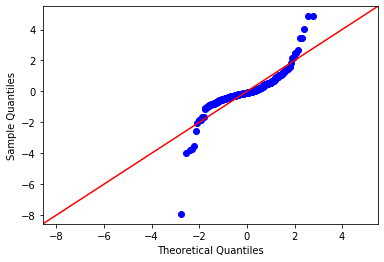

In [45]:
fig = sm.graphics.qqplot(model_final.resid, dist=stats.norm, line='45', fit=True)

In [46]:
x_cols = ['highest_price','num_reviews','price']
def regression_model(val_lst):
    for i, val in enumerate(val_lst):
        f= 'lowest_price~' + val
        model = ols(formula=f, data=df).fit()
        
        X_new = pd.DataFrame({val:[df[val].min(),df[val].max()]})
        preds = model.predict(X_new)
        df.plot(kind='scatter', x=val, y='lowest_price')
        plt.plot(X_new, preds, c='red', linewidth=2)
        plt.show()
        fig = plt.figure(figsize=(15,8))
        fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
        fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
        print(model.summary())

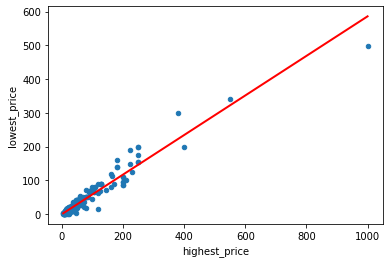

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     5302.
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          8.34e-222
Time:                        15:43:09   Log-Likelihood:                -1461.6
No. Observations:                 373   AIC:                             2927.
Df Residuals:                     371   BIC:                             2935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3778      0.747     -0.506

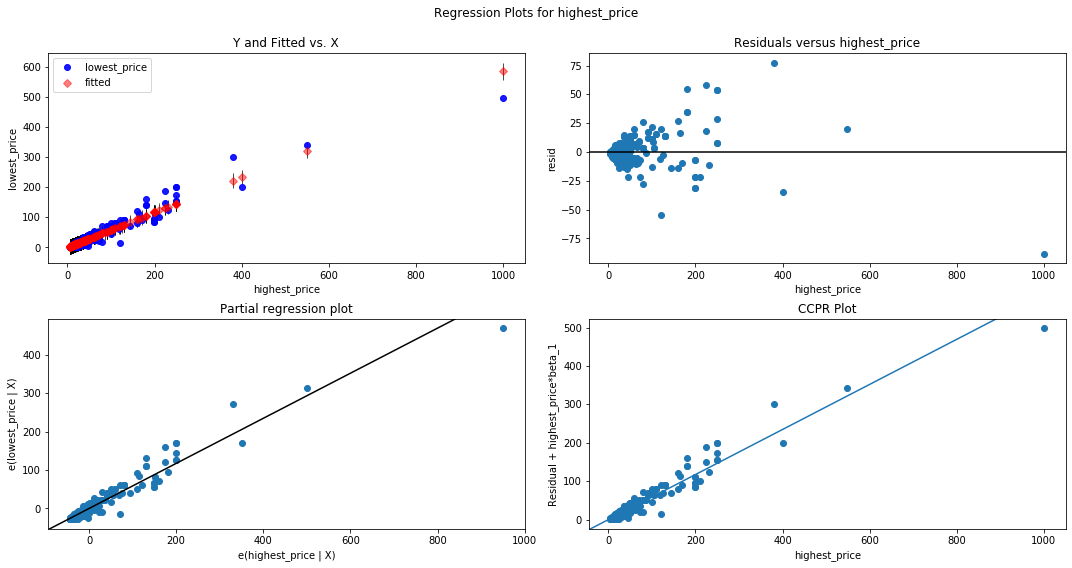

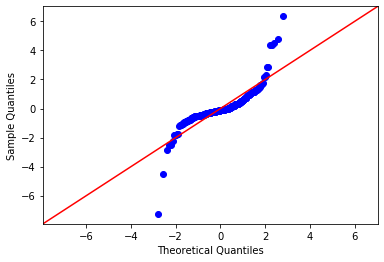

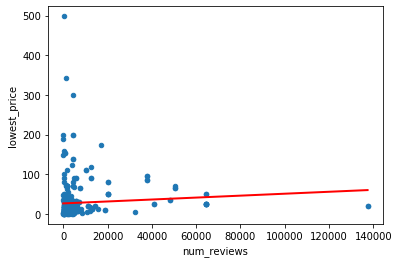

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.286
Date:                Sat, 21 Dec 2019   Prob (F-statistic):              0.131
Time:                        15:43:10   Log-Likelihood:                -1969.1
No. Observations:                 373   AIC:                             3942.
Df Residuals:                     371   BIC:                             3950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.1023      2.667     10.162      

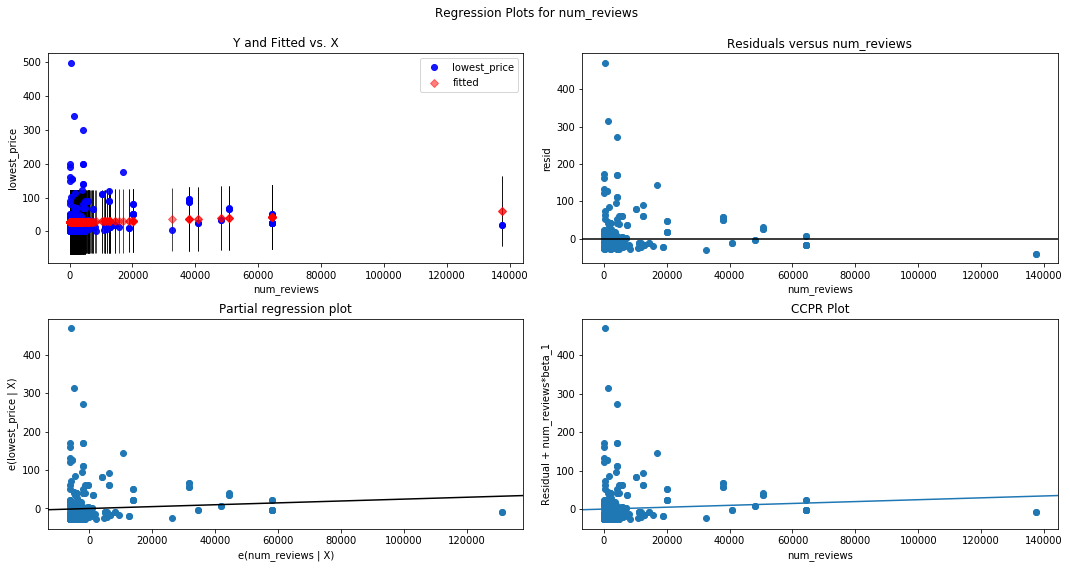

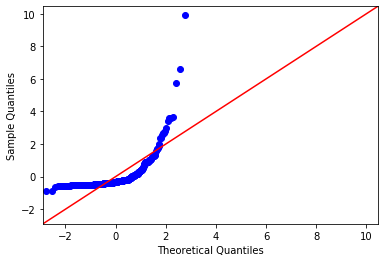

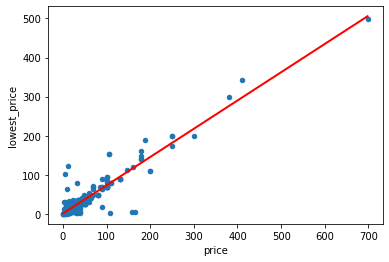

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sat, 21 Dec 2019   Prob (F-statistic):          1.72e-169
Time:                        15:43:11   Log-Likelihood:                -1562.9
No. Observations:                 369   AIC:                             3130.
Df Residuals:                     367   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2333      1.023      1.206      0.2

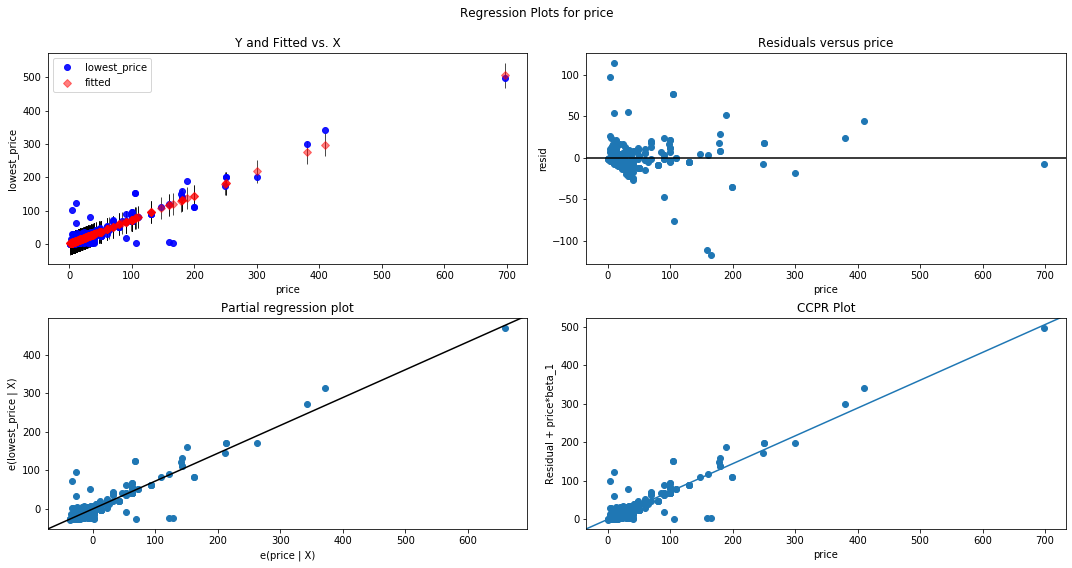

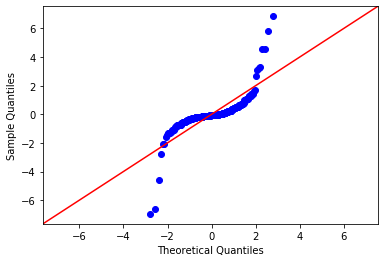

In [47]:
regression_model(x_cols)